In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(sns.plotting_context("talk"), 
        palette=sns.color_palette('Blues', n_colors=4),
        style=sns.axes_style("ticks"))

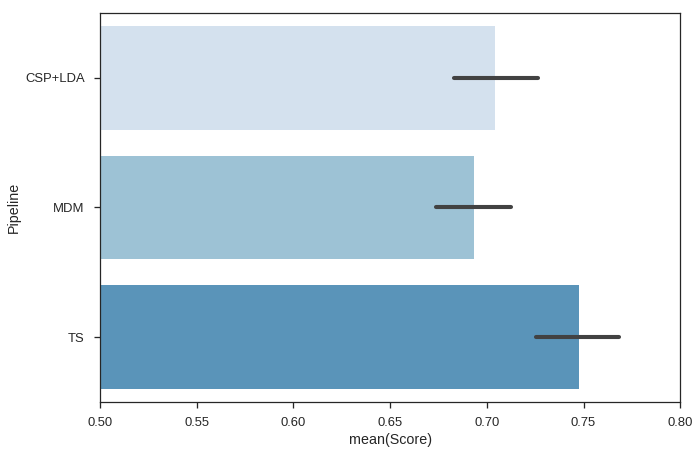

In [2]:
pipelines = ['CSP+LDA', 'MDM', 'TS']

results = []
for pipeline in pipelines:
    r = pd.read_csv('../results/MotorImagery/TwoClass/%s.csv' % (pipeline), index_col=0)
    results.append(r)
results = pd.concat(results, ignore_index=True)
sns.barplot(y='Pipeline', x='Score', data=results)
plt.xlim(0.5, 0.8);

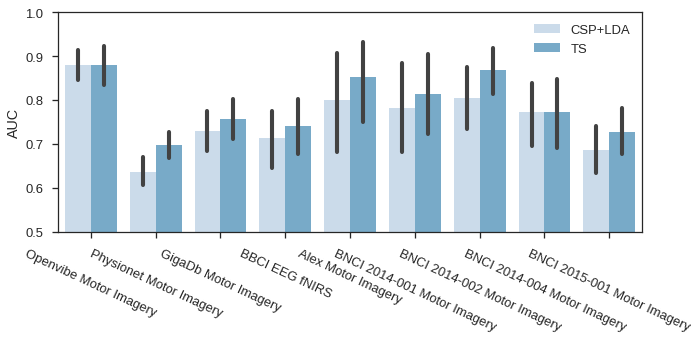

In [8]:
plt.figure(figsize=[10, 5])
pipelines = ['CSP+LDA','TS']

results = []
for pipeline in pipelines:
    r = pd.read_csv('../results/MotorImagery/TwoClass/%s.csv' % (pipeline), index_col=0)
    results.append(r)
results = pd.concat(results, ignore_index=True)
#results.loc[results['Pipeline']=='TS', 'Pipeline'] = 'Riemann'

g = sns.barplot(x='Dataset', y='Score', data=results, hue='Pipeline',
                palette=sns.color_palette('Blues', 3))
g.set_ylim(0.5,1)
g.set_ylabel('AUC')
g.set_xlabel('')
plt.xticks(rotation=-25)
plt.legend(loc='upper right')
#g.set_xticklabels(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'])

plt.tight_layout()
#plt.savefig('results_MI.pdf', dpi=300)

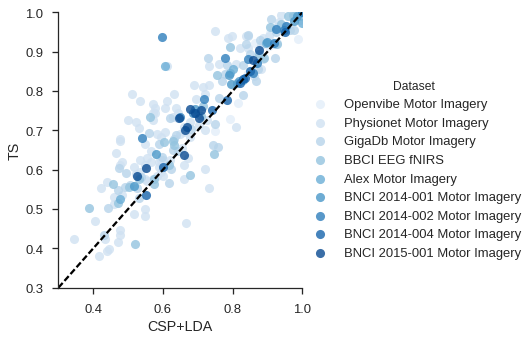

In [4]:
res = []
res = pd.read_csv('../results/MotorImagery/TwoClass/TS.csv', index_col=0)
res['TS'] = res['Score']
res['CSP+LDA'] = pd.read_csv('../results/MotorImagery/TwoClass/CSP+LDA.csv', index_col=0)['Score']
sns.lmplot(data=res, x='CSP+LDA', y='TS', fit_reg=False, palette='Blues', hue='Dataset')
plt.xlim(0.3, 1)
plt.ylim(0.3, 1)
plt.plot([0.3, 1], [0.3, 1], ls='--', c='k')

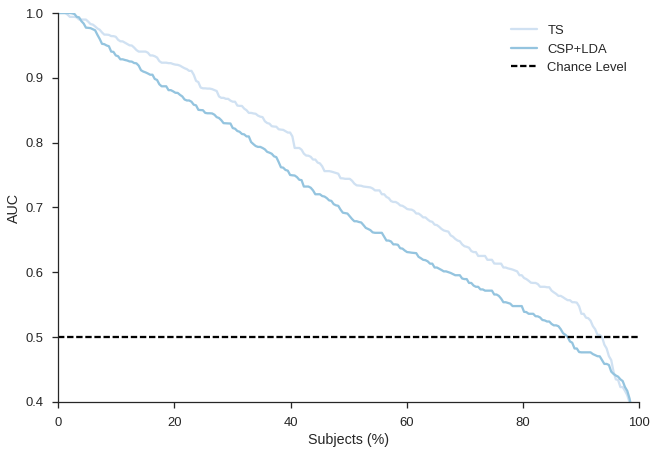

In [5]:
import numpy as np
per = (100. * np.arange(len(res))) / len(res)
plt.plot(per, np.sort(res['TS'].values)[::-1])
plt.plot(per, np.sort(res['CSP+LDA'].values)[::-1])
plt.ylim(0.4, 1.)
plt.plot([0, 100], [0.5, 0.5], ls='--', c='k')
plt.legend(['TS', 'CSP+LDA', 'Chance Level'])
plt.xlim(0, 100)
plt.ylabel('AUC')
plt.xlabel('Subjects (%)');
sns.despine()

(-0.4, 0.4)

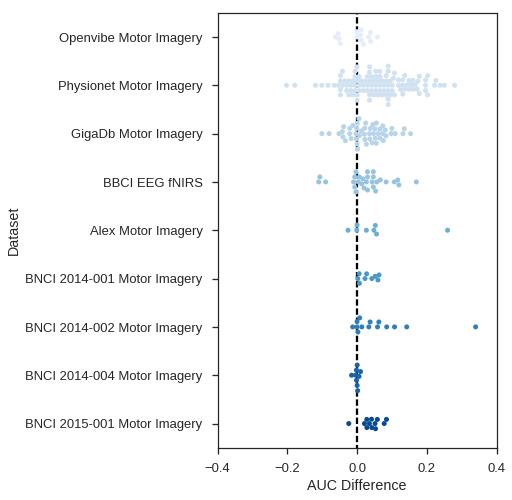

In [6]:
res = []
plt.figure(figsize=[5, 8])
res = pd.read_csv('../results/MotorImagery/TwoClass/TS.csv', index_col=0)
res['Score'] -= pd.read_csv('../results/MotorImagery/TwoClass/CSP+LDA.csv', index_col=0)['Score']
plt.plot([0, 0],[-1,10], ls='--', c='k')
sns.swarmplot(data=res, x='Score', y='Dataset', palette='Blues');
plt.xlabel('AUC Difference');
plt.xlim(-0.4, 0.4)